In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier


In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#loading the dataset
df = pd.read_csv("/content/CreditPrediction.csv")
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN


In [8]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

In [9]:
#checking for missing values
df.isnull().sum()

CLIENTNUM                       0
Customer_Age                    0
Gender                        199
Dependent_count                 0
Education_Level                 0
Marital_Status               1950
Income_Category                 0
Card_Category                1924
Months_on_book                223
Total_Relationship_Count       20
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 19                 10167
dtype: int64

In [10]:
# Drop the 'Unnamed: 19' column
df.drop(columns=['Unnamed: 19'], inplace=True)


In [11]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify if missing rows are dropped
print(df.isnull().sum())


CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 0 to 10163
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 6399 non-null   int64  
 1   Customer_Age              6399 non-null   float64
 2   Gender                    6399 non-null   object 
 3   Dependent_count           6399 non-null   int64  
 4   Education_Level           6399 non-null   object 
 5   Marital_Status            6399 non-null   object 
 6   Income_Category           6399 non-null   object 
 7   Card_Category             6399 non-null   object 
 8   Months_on_book            6399 non-null   float64
 9   Total_Relationship_Count  6399 non-null   float64
 10  Months_Inactive_12_mon    6399 non-null   int64  
 11  Contacts_Count_12_mon     6399 non-null   int64  
 12  Credit_Limit              6399 non-null   float64
 13  Total_Revolving_Bal       6399 non-null   int64  
 14  Total_A

In [13]:
# Calculate quartiles
quartiles = df['Credit_Limit'].quantile([0.25, 0.5, 0.75])

# Print quartiles
print("First quartile (25th percentile):", quartiles[0.25])
print("Second quartile (50th percentile):", quartiles[0.5])
print("Third quartile (75th percentile):", quartiles[0.75])


First quartile (25th percentile): 2540.5
Second quartile (50th percentile): 4546.0
Third quartile (75th percentile): 11217.0


In [14]:
# Calculate quartiles for each column
quartiles = df[['Months_Inactive_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Credit_Limit']].quantile([0.25, 0.5, 0.75])

# Display quartiles
print(quartiles)


      Months_Inactive_12_mon  Total_Trans_Ct  Avg_Utilization_Ratio  \
0.25                     2.0            45.0                  0.019   
0.50                     2.0            67.0                  0.176   
0.75                     3.0            81.0                  0.505   

      Credit_Limit  
0.25        2540.5  
0.50        4546.0  
0.75       11217.0  


In [15]:
# Compute summary statistics for numerical variables
summary_stats = df.describe()

# Display summary statistics
summary_stats


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,6.399000e+03,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000
mean,7.391884e+08,46.757147,2.343022,36.036099,3.814346,2.347242,2.441006,8651.539584,1155.053602,0.757967,4394.901547,64.835443,0.711760,0.274892
std,3.702225e+07,13.320643,1.310147,7.949519,1.569055,1.010760,1.107075,9099.590323,814.690132,0.216378,3414.132077,23.687668,0.232704,0.276037
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130659e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2540.500000,316.500000,0.627000,2128.500000,45.000000,0.583000,0.019000
50%,7.179669e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4546.000000,1260.000000,0.737000,3895.000000,67.000000,0.703000,0.176000
75%,7.733494e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11217.000000,1782.000000,0.856000,4737.000000,81.000000,0.818000,0.505000
max,8.282989e+08,352.330517,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,17995.000000,139.000000,3.500000,0.994000


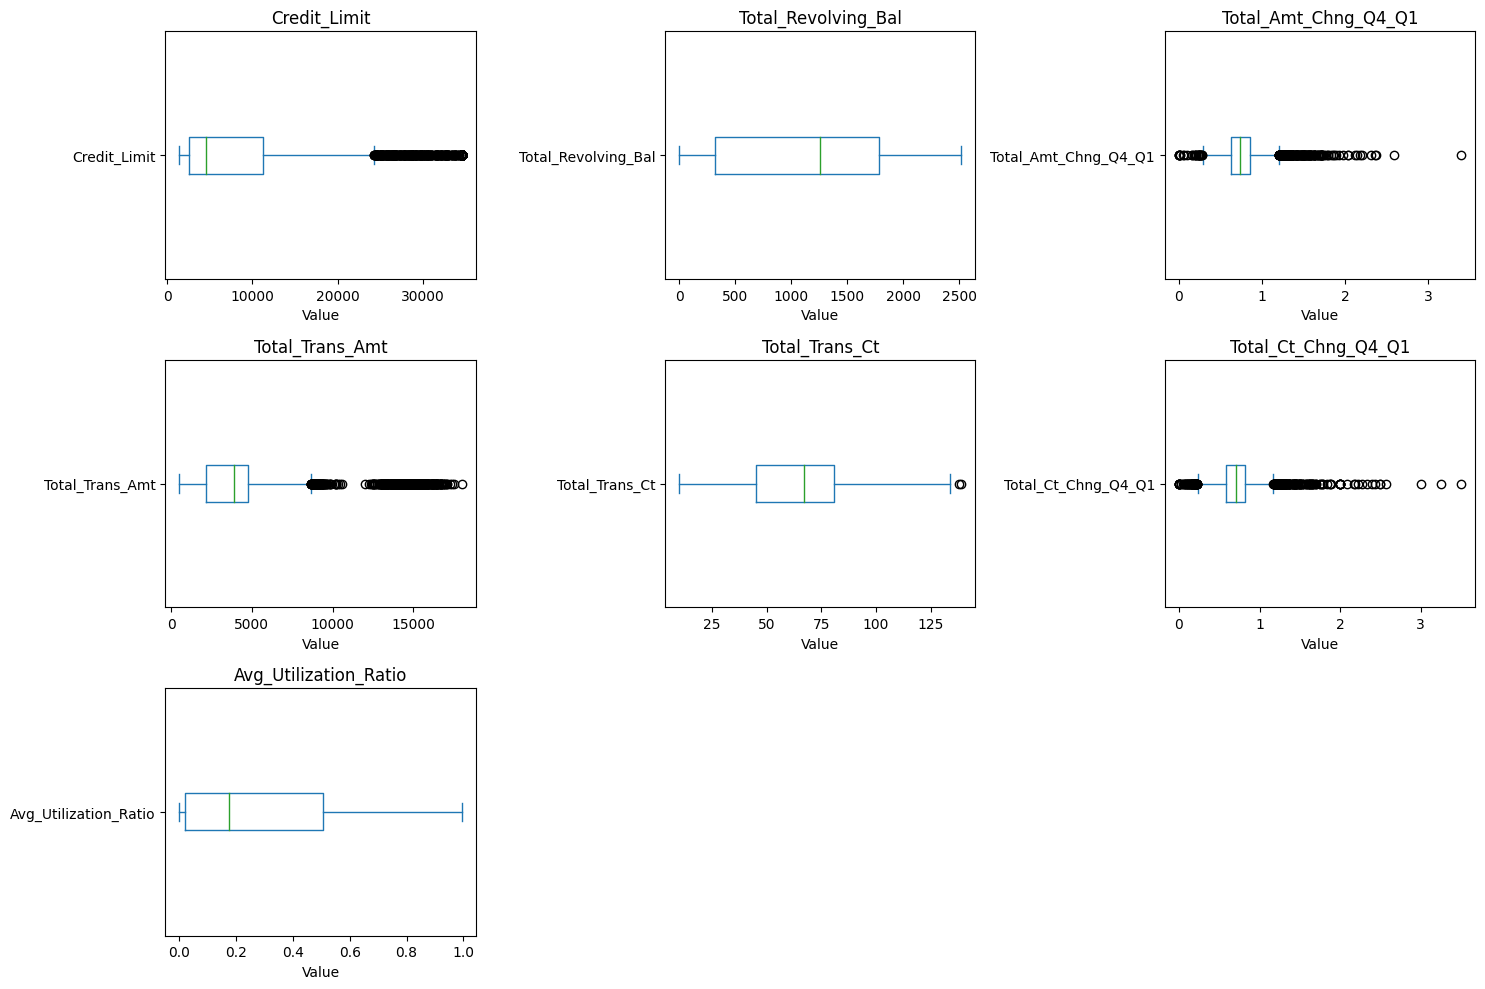

In [16]:
# Select numerical columns for the box plot
selected_columns = ['Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
                    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                    'Avg_Utilization_Ratio']

# Plot individual box plots for each selected numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    df[col].plot(kind='box', vert=False)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [17]:
# Define function to determine credit risk or default
def determine_credit_risk(row):
    # Define criteria based on features
    if (
        row['Total_Trans_Ct'] < 81 and  # Using the 75th percentile as threshold
        row['Avg_Utilization_Ratio'] > 0.5025 and
        row['Total_Revolving_Bal'] > 1700 or
        row['Months_Inactive_12_mon'] > 6
        # Using the 75th percentile as threshold
       ):  # Add condition for Income_Category
        return 'High Risk'
    else:
        return 'Low Risk'

# Apply the function to create the new column
df['Credit_Risk'] = df.apply(determine_credit_risk, axis=1)

# Display the updated dataset
df.head()


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Risk
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,Low Risk
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,Low Risk
5,713061558,44.0,M,2,Graduate,Married,$40K - $60K,Blue,36.0,3.0,1,2,4010.0,1247,1.376,1088,24,0.846,0.311,Low Risk
6,810347208,51.0,M,4,Unknown,Married,$120K +,Gold,46.0,6.0,1,3,34516.0,2264,1.975,1330,31,0.722,0.066,Low Risk
7,818906208,32.0,M,0,High School,Unknown,$60K - $80K,Silver,27.0,2.0,2,2,29081.0,1396,2.204,1538,36,0.714,0.048,Low Risk


In [18]:
# Count the occurrences of each category in the 'Credit_Risk' column
credit_risk_counts = df['Credit_Risk'].value_counts()

# Display the counts
print(credit_risk_counts)


Low Risk     5782
High Risk     617
Name: Credit_Risk, dtype: int64


<ipython-input-19-6241f78609a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Credit_Risk', palette='Set2')


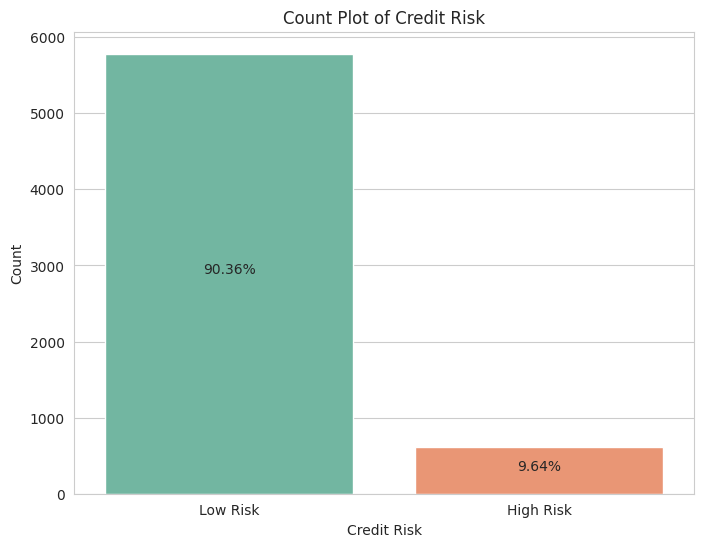

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count and percentage of each credit risk category
risk_counts = df['Credit_Risk'].value_counts()
total_samples = len(df)
risk_percentages = risk_counts / total_samples * 100

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Credit_Risk', palette='Set2')

# Add counts and percentages to the bars
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{height / total_samples * 100:.2f}%', ha='center')

plt.title('Count Plot of Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.show()


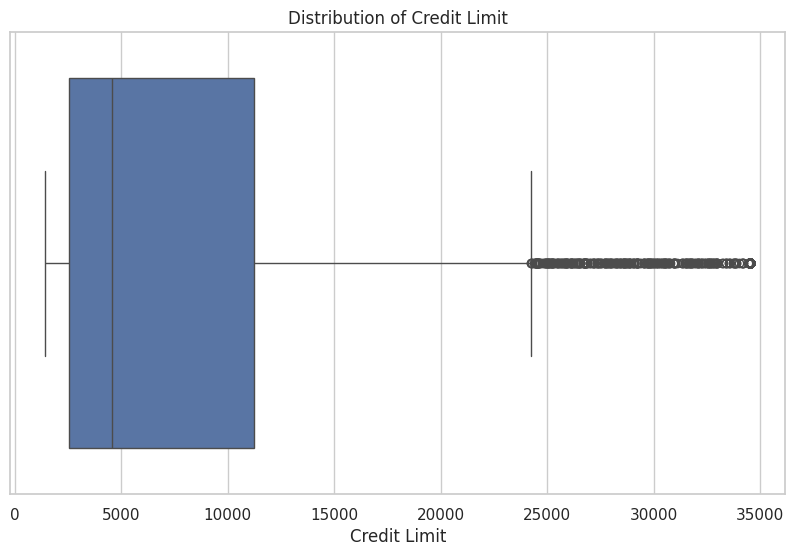

In [20]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of Credit_Limit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Credit_Limit'])
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.show()


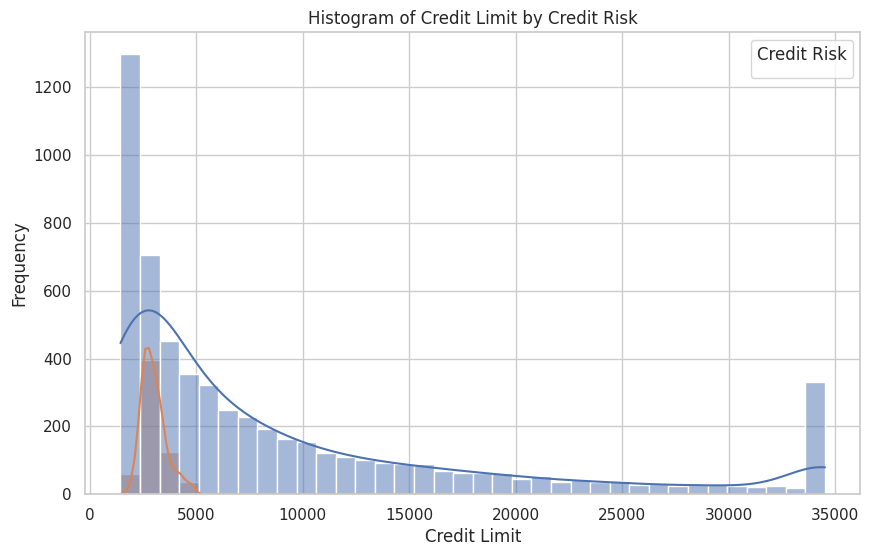

In [21]:


# Set the style of the plot
sns.set_style("whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Credit_Limit', hue='Credit_Risk', kde=True)
plt.title('Histogram of Credit Limit by Credit Risk')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend(title='Credit Risk')
plt.show()


<ipython-input-22-8bbbe92e5201>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Risk', y='Credit_Limit', data=df, palette='Set2')


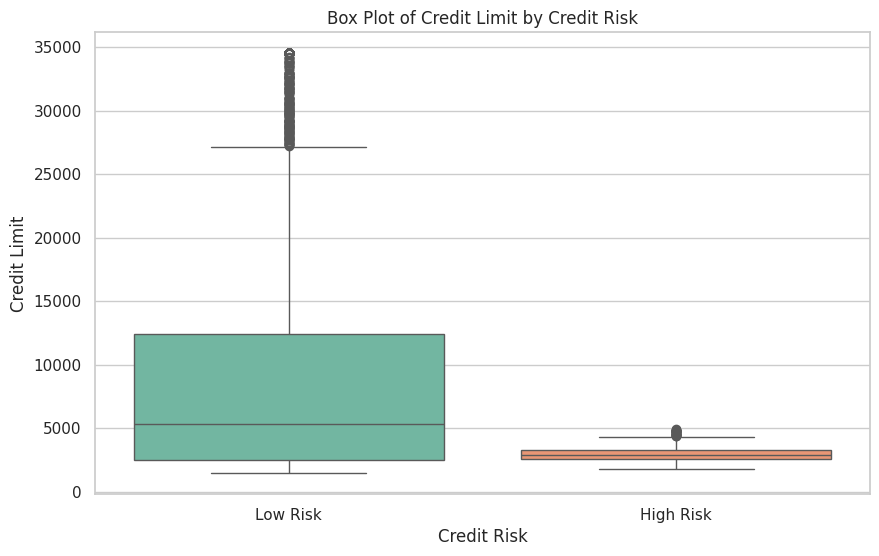

In [22]:


# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Risk', y='Credit_Limit', data=df, palette='Set2')
plt.title('Box Plot of Credit Limit by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Credit Limit')
plt.show()


<ipython-input-23-d2b232fefcb7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Credit_Risk', y='Credit_Limit', data=df, palette='Set2')


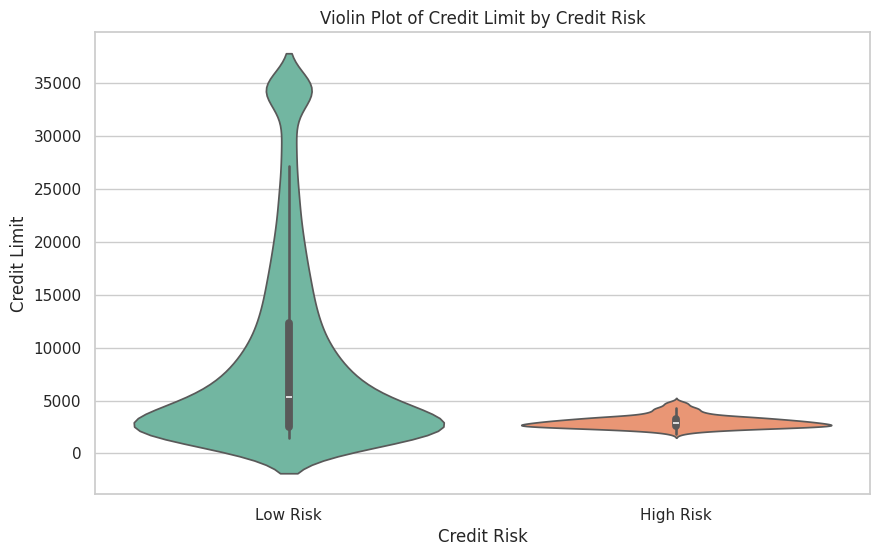

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Risk', y='Credit_Limit', data=df, palette='Set2')
plt.title('Violin Plot of Credit Limit by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Credit Limit')
plt.show()


In [24]:
# Group by 'Gender' and 'Credit_Risk' and count occurrences
gender_credit_count = df.groupby(['Gender', 'Credit_Risk']).size()

# Print the count values
print(gender_credit_count)


Gender  Credit_Risk
F       High Risk       419
        Low Risk       2966
M       High Risk       198
        Low Risk       2816
dtype: int64


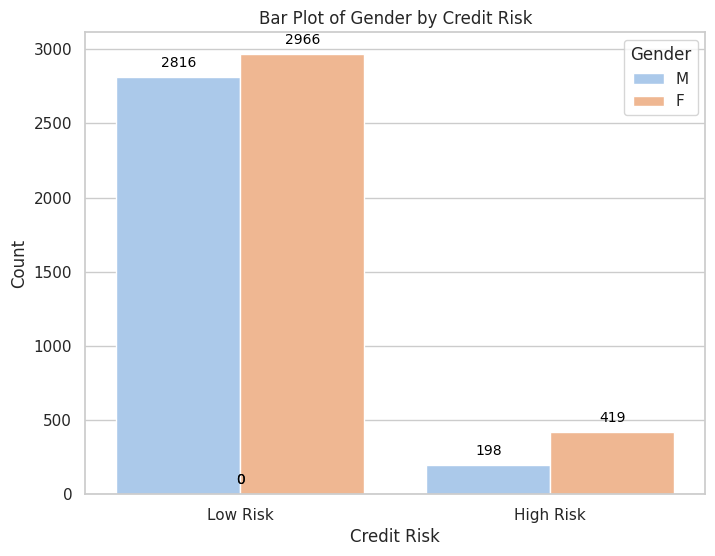

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Credit_Risk', hue='Gender', data=df, palette='pastel')
plt.title('Bar Plot of Gender by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.legend(title='Gender')

# Add count values above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [26]:
# Calculate count and percentage by education level and credit risk
education_credit_count = df.groupby(['Education_Level', 'Credit_Risk']).size().reset_index(name='Count')

# Display count and percentage
print(education_credit_count)


   Education_Level Credit_Risk  Count
0          College   High Risk     58
1          College    Low Risk    579
2        Doctorate   High Risk     22
3        Doctorate    Low Risk    262
4         Graduate   High Risk    195
5         Graduate    Low Risk   1810
6      High School   High Risk    120
7      High School    Low Risk   1128
8    Post-Graduate   High Risk     38
9    Post-Graduate    Low Risk    289
10      Uneducated   High Risk     84
11      Uneducated    Low Risk    858
12         Unknown   High Risk    100
13         Unknown    Low Risk    856


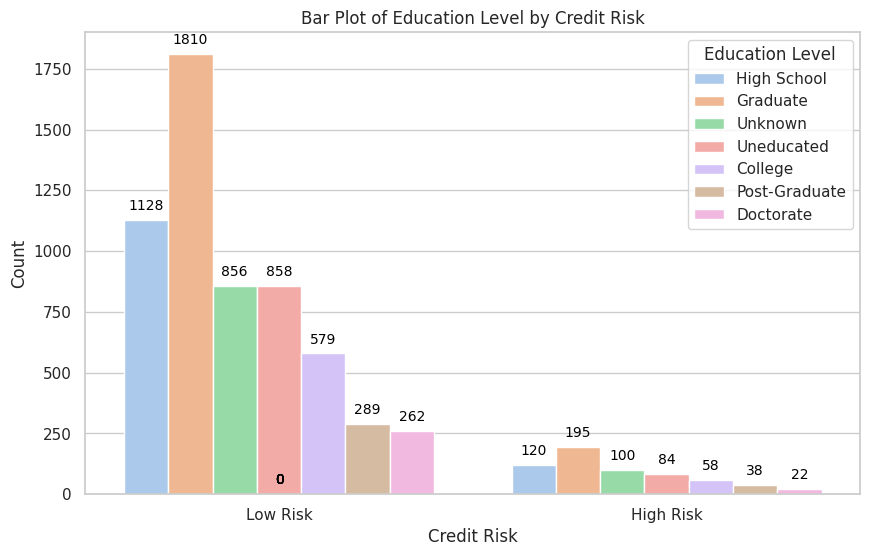

In [27]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Credit_Risk', hue='Education_Level', data=df, palette='pastel')
plt.title('Bar Plot of Education Level by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.legend(title='Education Level')

# Add count values above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [28]:
# Group by 'Marital_Status' and 'Credit_Risk' and count occurrences
marital_credit_count = df.groupby(['Marital_Status', 'Credit_Risk']).size()

# Print the count values
print(marital_credit_count)


Marital_Status  Credit_Risk
Divorced        High Risk        36
                Low Risk        431
Married         High Risk       334
                Low Risk       2647
Single          High Risk       206
                Low Risk       2248
Unknown         High Risk        41
                Low Risk        456
dtype: int64


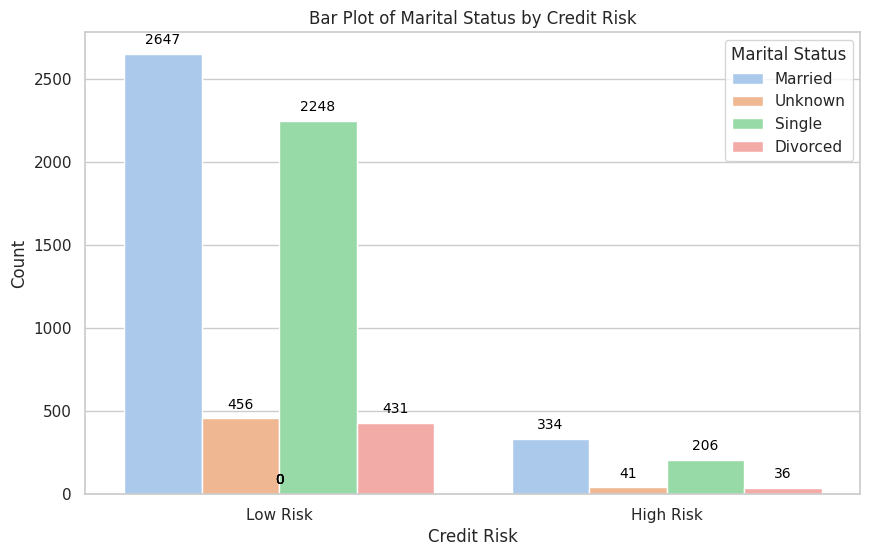

In [29]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Credit_Risk', hue='Marital_Status', data=df, palette='pastel')
plt.title('Bar Plot of Marital Status by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.legend(title='Marital Status')

# Add count values above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [30]:
# Count of Income_Category by Credit_Risk
income_count = df.groupby(['Income_Category', 'Credit_Risk']).size()
print(income_count)


Income_Category  Credit_Risk
$120K +          High Risk        16
                 Low Risk        442
$40K - $60K      High Risk       128
                 Low Risk        997
$60K - $80K      High Risk        52
                 Low Risk        834
$80K - $120K     High Risk        60
                 Low Risk        922
Less than $40K   High Risk       313
                 Low Risk       1952
Unknown          High Risk        48
                 Low Risk        635
dtype: int64


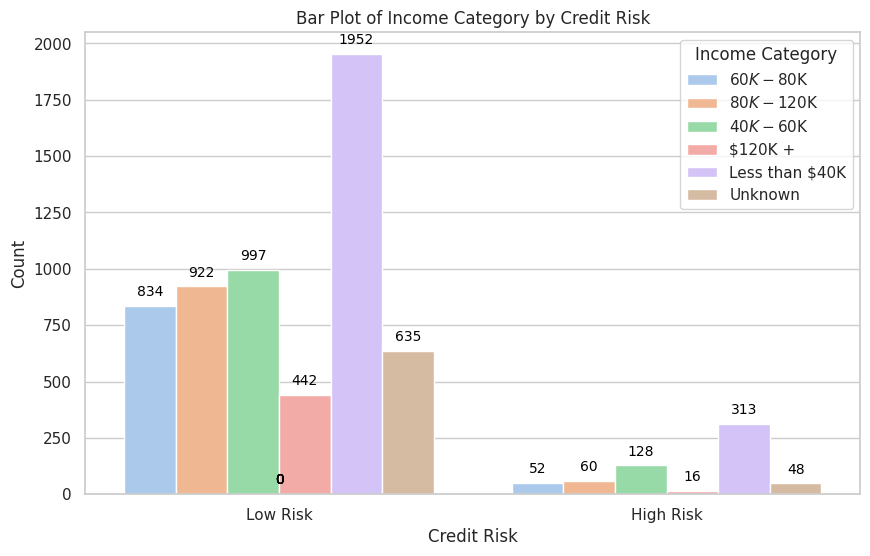

In [31]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Credit_Risk', hue='Income_Category', data=df, palette='pastel')
plt.title('Bar Plot of Income Category by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.legend(title='Income Category')

# Add count values above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


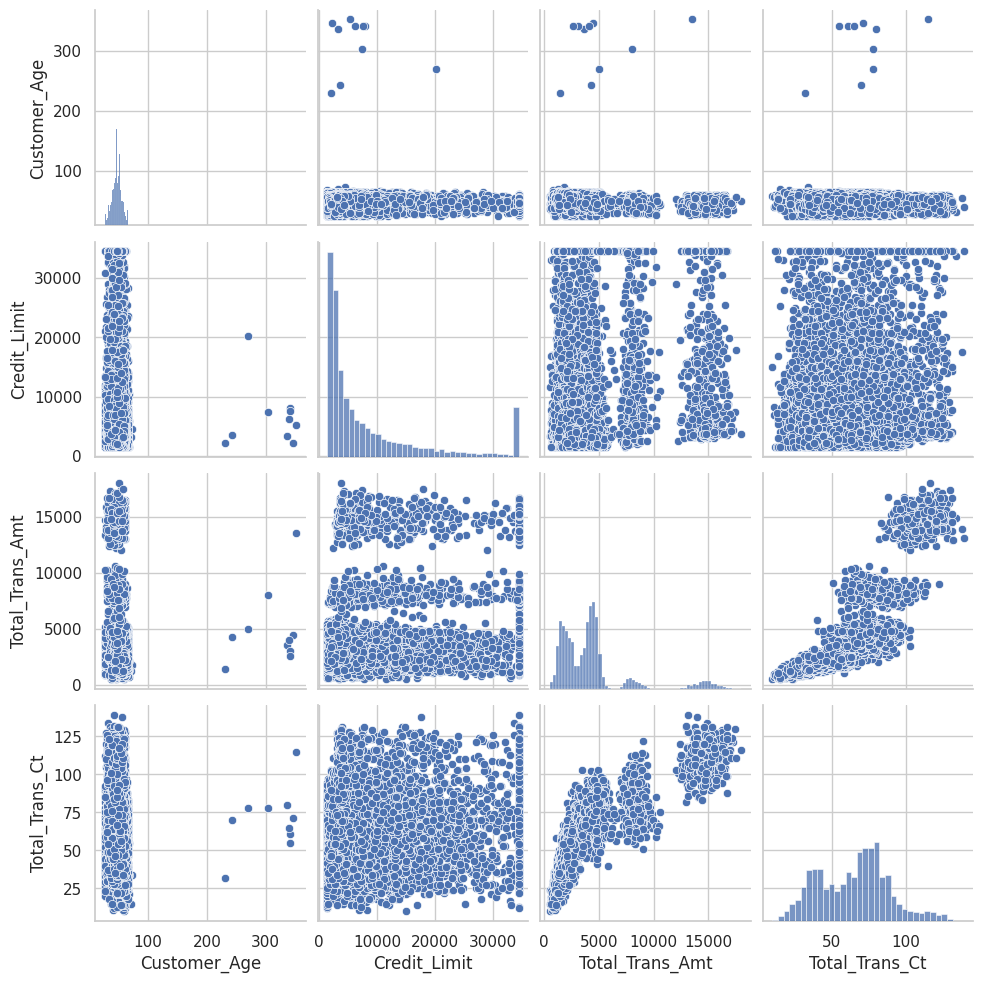

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical variables you want to explore
numerical_vars = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']

# Create scatter plot matrix
sns.pairplot(df[numerical_vars])
plt.show()


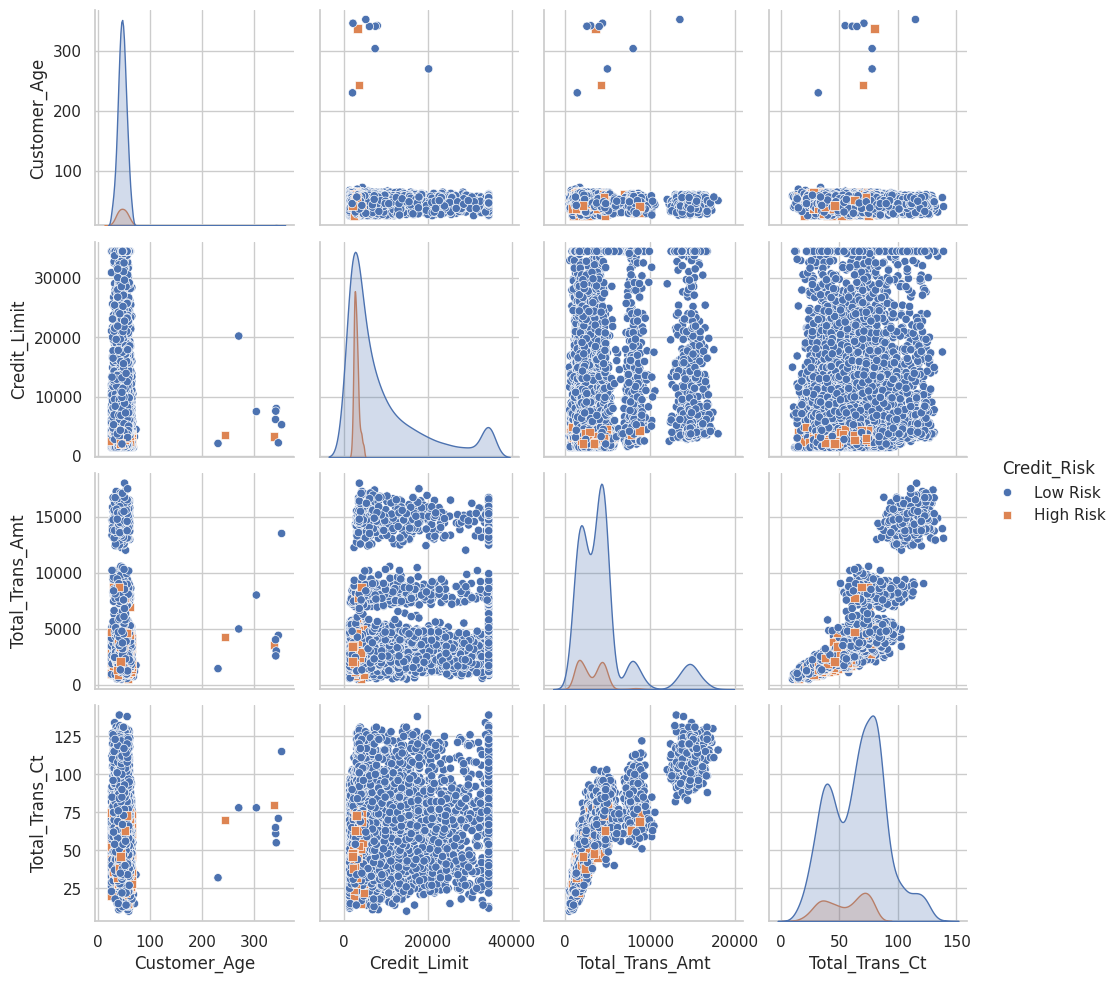

In [33]:
# Define the numerical variables and the target variable (Credit_Risk)
numerical_vars = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']
target_var = 'Credit_Risk'

# Create scatter plot matrix colored by Credit_Risk
sns.pairplot(df, vars=numerical_vars, hue=target_var, markers=["o", "s"])
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Credit_Risk']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df.head()


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Risk
0,768805383,45.0,1,3,3,1,2,0,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1
2,713982108,51.0,1,3,2,1,3,0,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1
5,713061558,44.0,1,2,2,1,1,0,36.0,3.0,1,2,4010.0,1247,1.376,1088,24,0.846,0.311,1
6,810347208,51.0,1,4,6,1,0,1,46.0,6.0,1,3,34516.0,2264,1.975,1330,31,0.722,0.066,1
7,818906208,32.0,1,0,3,3,2,3,27.0,2.0,2,2,29081.0,1396,2.204,1538,36,0.714,0.048,1


In [35]:
df.corr()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Risk
CLIENTNUM,1.000000,0.002179,0.018557,0.007140,-0.002955,-0.002184,-0.025788,0.013241,0.127008,0.018147,-0.008268,0.001942,0.011925,0.006553,0.022656,-0.020834,-0.005312,0.007928,-0.001379,-0.001914
Customer_Age,0.002179,1.000000,0.003797,-0.091832,-0.008134,0.011734,-0.009783,-0.015918,0.502680,-0.028683,0.035304,0.019178,-0.011130,0.012608,-0.053812,-0.022232,-0.030698,-0.009318,0.015490,-0.019769
Gender,0.018557,0.003797,1.000000,-0.006660,-0.005336,-0.008055,-0.533100,0.082738,0.000874,0.007695,0.002606,0.040105,0.424425,0.025955,0.046001,0.027350,-0.078832,0.000715,-0.259508,0.098233
Dependent_count,0.007140,-0.091832,-0.006660,1.000000,0.005133,0.009401,-0.027090,0.034692,-0.112016,-0.033415,-0.011826,-0.050217,0.069164,0.006091,-0.035996,0.040866,0.063680,0.009006,-0.028985,0.021680
Education_Level,-0.002955,-0.008134,-0.005336,0.005133,1.000000,0.012733,-0.001891,-0.004591,-0.019968,0.013550,-0.011097,0.020832,0.001622,0.021661,0.002551,0.012866,0.007131,0.010167,0.019478,-0.010287
Marital_Status,-0.002184,0.011734,-0.008055,0.009401,0.012733,1.000000,0.014121,0.038970,-0.003542,-0.026800,-0.002320,0.002352,0.032181,-0.046776,-0.029600,0.041225,0.070937,-0.007365,-0.043538,0.025292
Income_Category,-0.025788,-0.009783,-0.533100,-0.027090,-0.001891,0.014121,1.000000,-0.056714,-0.016093,0.011215,0.016421,-0.011050,-0.227439,-0.023252,-0.012125,-0.022279,0.031241,0.007451,0.122716,-0.048645
Card_Category,0.013241,-0.015918,0.082738,0.034692,-0.004591,0.038970,-0.056714,1.000000,-0.001370,-0.069105,-0.006425,-0.000024,0.486292,0.001945,0.001734,0.169095,0.102888,-0.011335,-0.210748,0.086493
Months_on_book,0.127008,0.502680,0.000874,-0.112016,-0.019968,-0.003542,-0.016093,-0.001370,1.000000,-0.011066,0.071268,-0.012998,-0.001417,0.020092,-0.045784,-0.042563,-0.051840,-0.017137,0.005826,-0.008507
Total_Relationship_Count,0.018147,-0.028683,0.007695,-0.033415,0.013550,-0.026800,0.011215,-0.069105,-0.011066,1.000000,-0.013746,0.056589,-0.065526,0.010174,0.044604,-0.351272,-0.248148,0.034334,0.062345,-0.057215


In [36]:
correlation_matrix = df.corr()
credit_risk_correlation = correlation_matrix['Credit_Risk']
print(credit_risk_correlation)


CLIENTNUM                  -0.001914
Customer_Age               -0.019769
Gender                      0.098233
Dependent_count             0.021680
Education_Level            -0.010287
Marital_Status              0.025292
Income_Category            -0.048645
Card_Category               0.086493
Months_on_book             -0.008507
Total_Relationship_Count   -0.057215
Months_Inactive_12_mon      0.013226
Contacts_Count_12_mon      -0.011430
Credit_Limit                0.202903
Total_Revolving_Bal        -0.396029
Total_Amt_Chng_Q4_Q1       -0.022338
Total_Trans_Amt             0.123092
Total_Trans_Ct              0.139760
Total_Ct_Chng_Q4_Q1        -0.015310
Avg_Utilization_Ratio      -0.539864
Credit_Risk                 1.000000
Name: Credit_Risk, dtype: float64


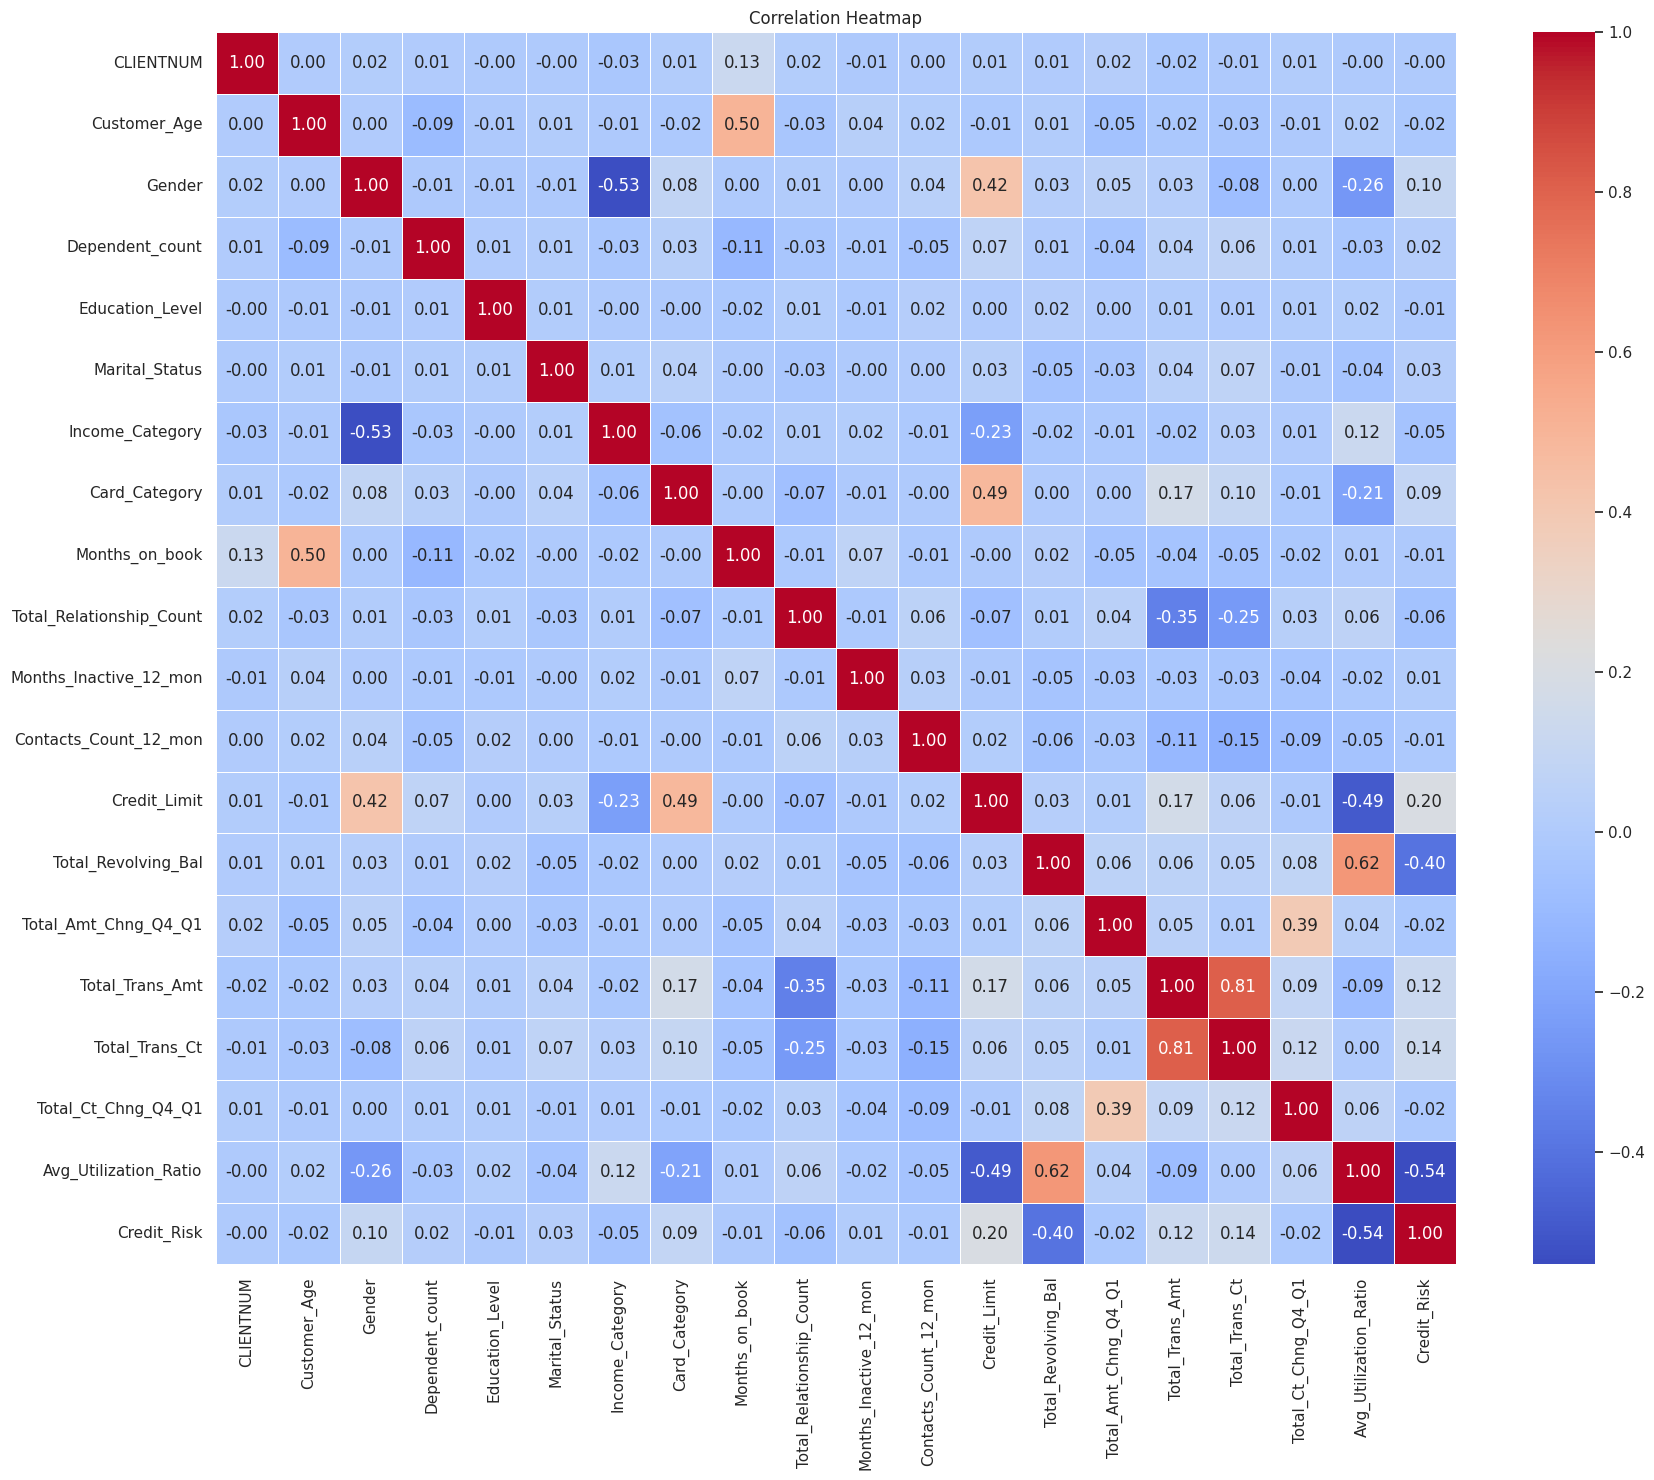

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [38]:


# Define features (X) and target variable (y)
X = df.drop(columns=['CLIENTNUM', 'Credit_Risk'])  # Assuming 'CLIENTNUM' is the customer ID column
y = df['Credit_Risk']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[  97   33]
 [  15 1135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       130
           1       0.97      0.99      0.98      1150

    accuracy                           0.96      1280
   macro avg       0.92      0.87      0.89      1280
weighted avg       0.96      0.96      0.96      1280



Confusion Matrix:
 [[  97   33]
 [  15 1135]]


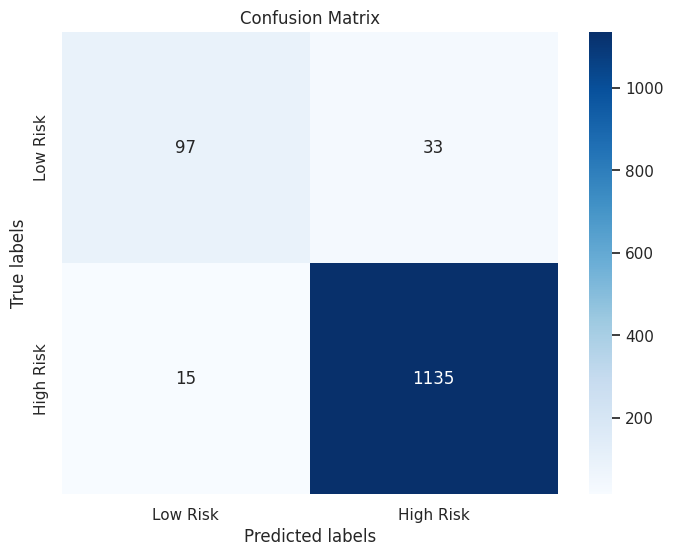


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       130
           1       0.97      0.99      0.98      1150

    accuracy                           0.96      1280
   macro avg       0.92      0.87      0.89      1280
weighted avg       0.96      0.96      0.96      1280



In [39]:

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [40]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Round probabilities to get predicted classes
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report and confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/50
128/128 [==============================] - 2s 4ms/step - loss: 107.2724 - accuracy: 0.8242 - val_loss: 10.3039 - val_accuracy: 0.9268
Epoch 2/50
128/128 [==============================] - 0s 3ms/step - loss: 23.4914 - accuracy: 0.8733 - val_loss: 2.8080 - val_accuracy: 0.9346
Epoch 3/50
128/128 [==============================] - 0s 3ms/step - loss: 13.4248 - accuracy: 0.8777 - val_loss: 0.8628 - val_accuracy: 0.9326
Epoch 4/50
128/128 [==============================] - 0s 3ms/step - loss: 7.5699 - accuracy: 0.8855 - val_loss: 0.4100 - val_accuracy: 0.9316
Epoch 5/50
128/128 [==============================] - 0s 3ms/step - loss: 4.2101 - accuracy: 0.8908 - val_loss: 0.3119 - val_accuracy: 0.9287
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 2.5064 - accuracy: 0.8996 - val_loss: 0.2538 - val_accuracy: 0.9268
Epoch 7/50
128/128 [==============================] - 0s 3ms/step - loss: 2.2503 - accuracy: 0.8974 - val_loss: 0.2417 - val_accuracy: 0.9258
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import confusion_matrix

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Round probabilities to get predicted classes
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


40/40 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[   0  130]
 [   0 1150]]


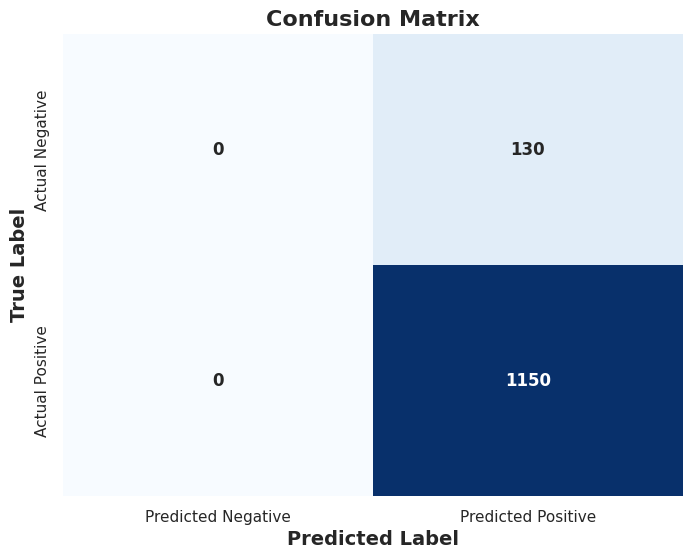

In [42]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()